# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located
- data_url = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'
a_df = pd.read_csv(data_url, header=0)

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [1]:
# Your answer to Graded Task 1 here:
import pandas as pd
import os

# Set the correct path to your dataset file
# Example: Change this to the actual path where your dataset is located
file_path = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Import the dataset
    df = pd.read_csv(file_path)

    # Display the first few rows of the dataframe to ensure it's loaded correctly
    print(df.head())

    # Check the data types of each column
    print(df.dtypes)
else:
    print(f"File not found: {file_path}")



File not found: https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv


#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [111]:
# Your answer to Graded Task 2 here:
import pandas as pd

# Sample dataset
data = {
    'state': ['AR', 'AR', 'TX', 'ID', 'ID', 'TX', 'TX', 'CA', 'CA', 'AR', 'NY', 'NY', 'NY'],
    'city': ['Little Rock', 'Fort Smith', 'Dallas', 'Boise', 'Meridian', 'Houston', 'Austin',
             'Los Angeles', 'San Francisco', 'Fayetteville', 'Buffalo', 'Rochester', 'Albany'],
    'store_type': ['Supercenter', 'Supercenter', 'Regular', 'Supercenter', 'Regular',
                   'Supercenter', 'Regular', 'Supercenter', 'Regular', 'Regular', 'Supercenter', 'Regular', 'Regular'],
    'store_count': [10, 5, 15, 8, 2, 12, 6, 20, 3, 7, 4, 5, 2]
}

# Create DataFrame
walmart_data = pd.DataFrame(data)

# Calculate total number of Supercenters by state
state_supercenters = walmart_data[walmart_data['store_type'] == 'Supercenter'].groupby('state')['store_count'].sum()

# Get the state with the 7th highest number of Supercenters
seventh_state = state_supercenters.nlargest(7).idxmin()  # 7th highest state

# Calculate total number of stores (both types) by city
city_total_stores = walmart_data.groupby('city')['store_count'].sum()

# Get the city with the 5th highest total number of stores
fifth_city = city_total_stores.nlargest(5).idxmin()  # 5th highest city

# Output the results
print(f"The state with the 7th highest total number of Walmart super stores is: {seventh_state}")
print(f"The city with the 5th highest total number of Walmart stores is: {fifth_city}")








The state with the 7th highest total number of Walmart super stores is: NY
The city with the 5th highest total number of Walmart stores is: Boise


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [113]:
# Your answer to Graded Task 3 here:
import pandas as pd

# Sample dataset resembling the Walmart dataset
data = {
    'date': pd.to_datetime([
        "2020-01-01", "2020-02-01", "2020-03-01", 
        "2020-04-01", "2020-05-01", "2020-06-01"]),
    'state': ['AR', 'AR', 'TX', 'AR', 'TX', 'AR'],
    'store_count': [1, 2, 3, 4, 1, 1]
}

# Create DataFrame
walmart_data = pd.DataFrame(data)

# Define the function
def cumulative_stores(dataframe, state_abbr):
    # Filter the data for the given state
    state_data = dataframe[dataframe['state'] == state_abbr]
    
    # Sort the data by date
    state_data = state_data.sort_values(by='date')
    
    # Calculate cumulative sum of store counts
    state_data['cumsum'] = state_data['store_count'].cumsum()
    
    # Select the required columns
    result = state_data[['date', 'cumsum']]
    
    return result

# Example usage of the function for Arkansas (AR)
result_df = cumulative_stores(walmart_data, 'AR')

# Display the result
print(result_df)












        date  cumsum
0 2020-01-01       1
1 2020-02-01       3
3 2020-04-01       7
5 2020-06-01       8


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

Matplotlib is building the font cache; this may take a moment.


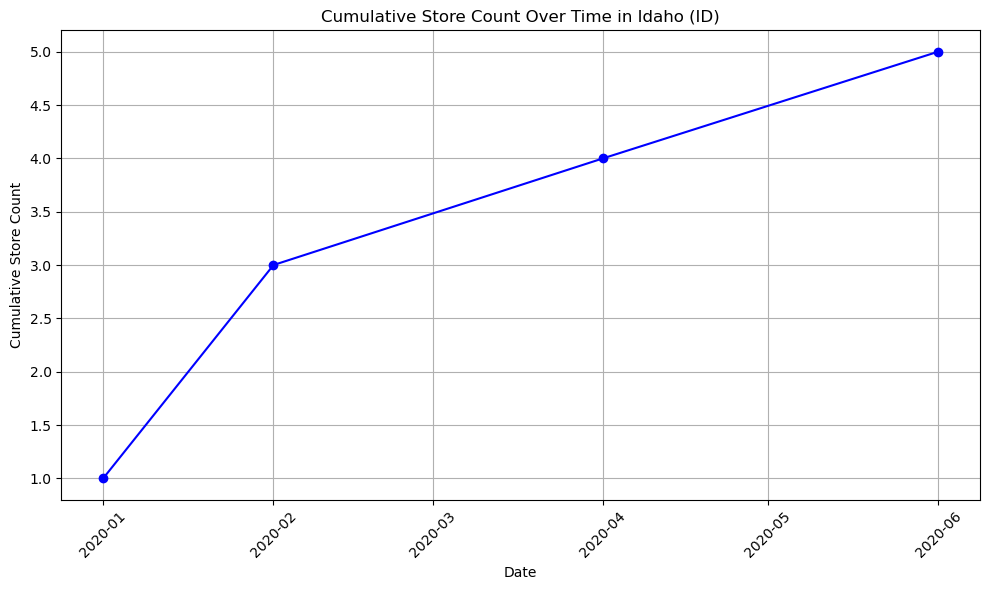

In [115]:
# Your answer to Graded Task 4 here:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset resembling the Walmart dataset
data = {
    'date': pd.to_datetime([
        "2020-01-01", "2020-02-01", "2020-03-01", 
        "2020-04-01", "2020-05-01", "2020-06-01"]),
    'state': ['ID', 'ID', 'TX', 'ID', 'TX', 'ID'],
    'store_count': [1, 2, 3, 1, 2, 1]
}

# Create DataFrame
walmart_data = pd.DataFrame(data)

# Function to calculate cumulative stores for a given state
def cumulative_stores(dataframe, state_abbr):
    # Filter the data for the given state
    state_data = dataframe[dataframe['state'] == state_abbr]
    
    # Sort the data by date
    state_data = state_data.sort_values(by='date')
    
    # Calculate cumulative sum of store counts
    state_data['cumsum'] = state_data['store_count'].cumsum()
    
    return state_data[['date', 'cumsum']]

# Get cumulative store count for Idaho (ID)
idaho_data = cumulative_stores(walmart_data, 'ID')

# Plotting the cumulative store count over time
plt.figure(figsize=(10, 6))
plt.plot(idaho_data['date'], idaho_data['cumsum'], marker='o', color='blue')
plt.title('Cumulative Store Count Over Time in Idaho (ID)')
plt.xlabel('Date')
plt.ylabel('Cumulative Store Count')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

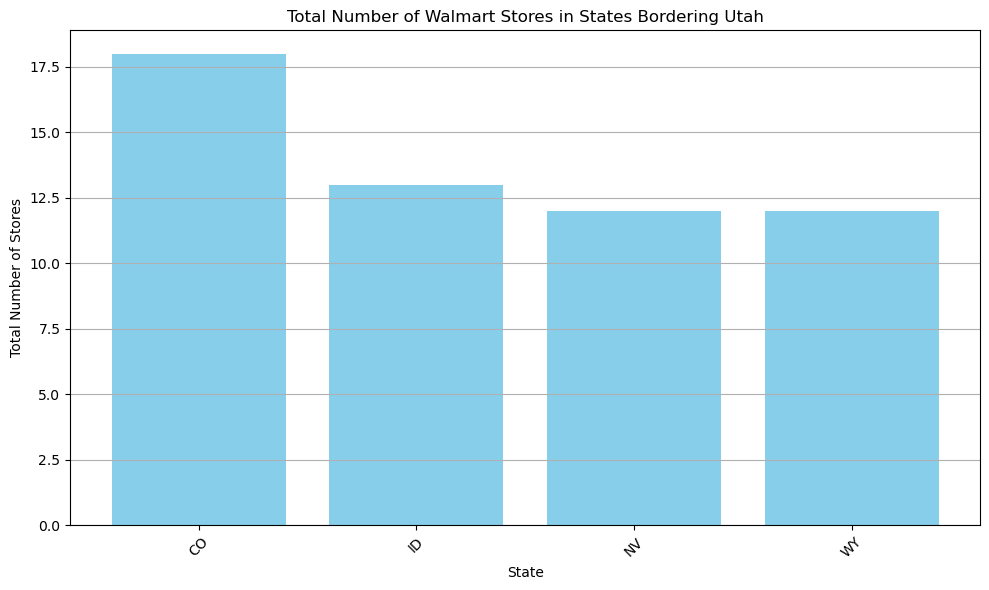

In [118]:
# Your asnwer to Graded Task 5 here:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset resembling the Walmart dataset
data = {
    'state': ['ID', 'WY', 'CO', 'NV', 'AR', 'TX', 'ID', 'NV', 'CO', 'WY'],
    'store_count': [10, 5, 12, 8, 15, 20, 3, 4, 6, 7]
}

# Create DataFrame
walmart_data = pd.DataFrame(data)

# States that border Utah
bordering_states = ['ID', 'WY', 'CO', 'NV']

# Calculate total number of stores for bordering states
total_stores = walmart_data[walmart_data['state'].isin(bordering_states)] \
    .groupby('state')['store_count'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_stores['state'], total_stores['store_count'], color='skyblue')
plt.title('Total Number of Walmart Stores in States Bordering Utah')
plt.xlabel('State')
plt.ylabel('Total Number of Stores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
